In [1]:
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 249.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install git+https://github.com/ahendriksen/tomosipo.git

  Cloning https://github.com/ahendriksen/tomosipo.git to /tmp/pip-req-build-gmc9p6p9
  Running command git clone --filter=blob:none --quiet https://github.com/ahendriksen/tomosipo.git /tmp/pip-req-build-gmc9p6p9
  Resolved https://github.com/ahendriksen/tomosipo.git to commit 6bf42a4079336671f182969b854103aecbef8ce6
  Preparing metadata (setup.py) ... done


In [3]:
!pip install gcsfs

In [4]:
import numpy as np
print(np.__version__)

1.26.4


In [5]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import astra
import tomosipo as ts
from matplotlib import pyplot as plt
from functions.dataset import LoDoPaBDataset
from google.colab import auth
import gcsfs
import h5py
import torch

## Testing good data access

In [7]:
auth.authenticate_user()

In [8]:
# bucket's name
bucket_name = 'final_project_dis'

fs = gcsfs.GCSFileSystem()

# Show files in bucket
files = fs.ls(f'{bucket_name}')
print(files)

bucket_path = f"{bucket_name}"

['final_project_dis/ground_truth_test', 'final_project_dis/ground_truth_train', 'final_project_dis/ground_truth_validation']


In [26]:
# Testing it reads from the correct path
train_path = 'gs://final_project_dis/ground_truth_train'
train_set = LoDoPaBDataset(train_path, n_single_BP= 16, i_0 = 100000, sigma = 20, seed = 29072000, debug = True)
print("[Dataset] Length:", len(train_set))

[Dataset] Using directory: gs://final_project_dis/ground_truth_train
[Dataset] Found 280 files.
[Dataset] Length: 35840


 ## Testing indexis and sinogram creation

[Dataset] Taking file number: 0
[Dataset] Using file path: gs://final_project_dis/ground_truth_train/ground_truth_train_000.hdf5
[Dataset] Taking image number: 1
Measured photons stats: 0.0 101254.0
Sinogram shape: torch.Size([1, 1000, 513])
Ground Truth Image Shape: (362, 362)
Sinogram Image Shape: (1000, 513)
Noisy Sinogram Image Shape: (1000, 513)
Single Backprojected Images Shape: torch.Size([16, 362, 362])


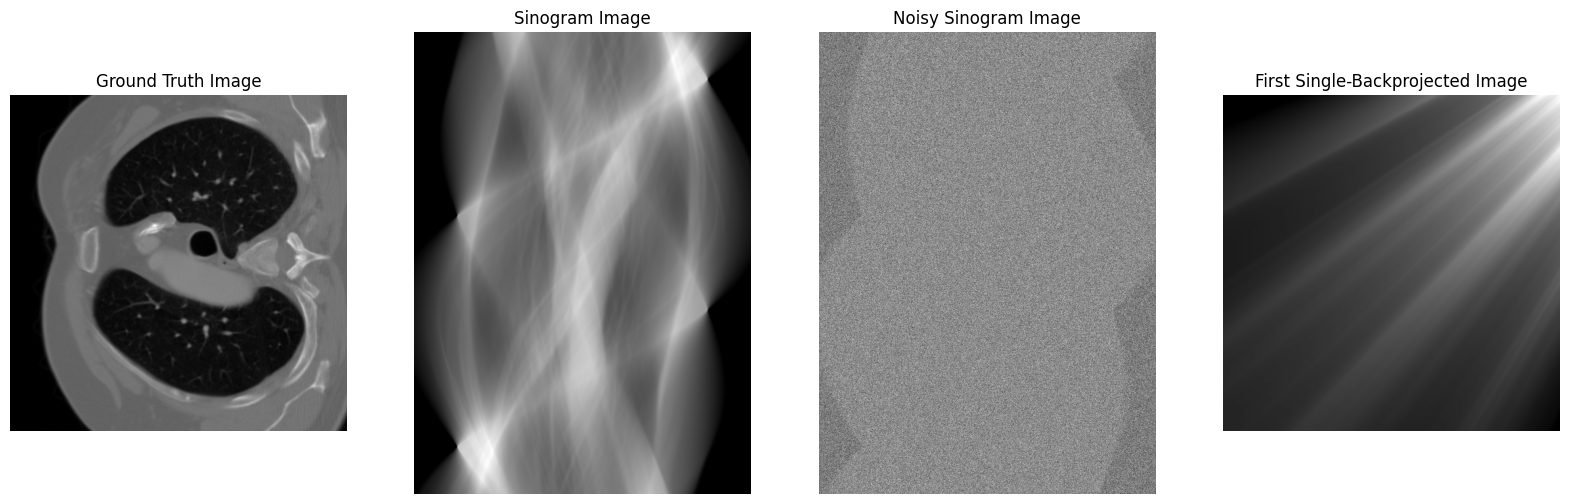

In [27]:
# Get the first sample from the dataset
sample = train_set[1]

# Extract the ground truth image and the sinogram
ground_truth_image = sample['ground_truth'][0].squeeze().numpy()  # Remove batch dim and convert to NumPy
sinogram_image = sample['sinogram'][0].squeeze().numpy()
noisy_sinogram_image = sample['noisy_sinogram'][0].squeeze().numpy()
single_back_projection = sample['single_back_projections']

# Print the shapes
print("Ground Truth Image Shape:", ground_truth_image.shape)
print("Sinogram Image Shape:", sinogram_image.shape)
print("Noisy Sinogram Image Shape:", noisy_sinogram_image.shape)
print("Single Backprojected Images Shape:", single_back_projection.shape)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Ground truth image
axes[0].imshow(ground_truth_image, cmap='gray')
axes[0].set_title("Ground Truth Image")
axes[0].axis("off")

# Sinogram image
axes[1].imshow(sinogram_image, cmap='gray',aspect='auto')
axes[1].set_title("Sinogram Image")
axes[1].axis("off")

# Noisy Sinogram image
axes[2].imshow(noisy_sinogram_image, cmap='gray',aspect='auto')
axes[2].set_title("Noisy Sinogram Image")
axes[2].axis("off")

# Single-Backprojected image
axes[3].imshow(single_back_projection[4], cmap='gray') # 0 vertical, around 7-8 horizontal
axes[3].set_title("First Single-Backprojected Image")
axes[3].axis("off")

# Show the plot
plt.show()

In [ ]:
print("Ground truth range:", ground_truth_image.min().item(), ground_truth.max().item())

[Dataset] Taking file number: 0
[Dataset] Using file path: gs://final_project_dis/ground_truth_train/ground_truth_train_000.hdf5
[Dataset] Taking image number: 0
Measured photons stats: 0.0 101250.0
Sinogram shape: torch.Size([1, 1000, 513])
Sinogram shape: torch.Size([1, 1000, 513])
Sinogram raw values (first 5x5):
tensor([[0.0087, 0.0071, 0.0142, 0.0171, 0.0216],
        [0.0070, 0.0097, 0.0158, 0.0184, 0.0218],
        [0.0066, 0.0131, 0.0168, 0.0205, 0.0209],
        [0.0084, 0.0150, 0.0173, 0.0218, 0.0202],
        [0.0115, 0.0163, 0.0195, 0.0219, 0.0217]])

exp(-sinogram) (first 5x5):
tensor([[0.9913, 0.9929, 0.9859, 0.9831, 0.9786],
        [0.9930, 0.9903, 0.9843, 0.9818, 0.9784],
        [0.9934, 0.9870, 0.9834, 0.9797, 0.9793],
        [0.9916, 0.9851, 0.9828, 0.9784, 0.9800],
        [0.9885, 0.9838, 0.9807, 0.9783, 0.9785]])

Max of exp(-sinogram): 1.0
Min of exp(-sinogram): 6.092985852730737e-41

Sinogram min: 0.0
Sinogram max: 92.5988540649414


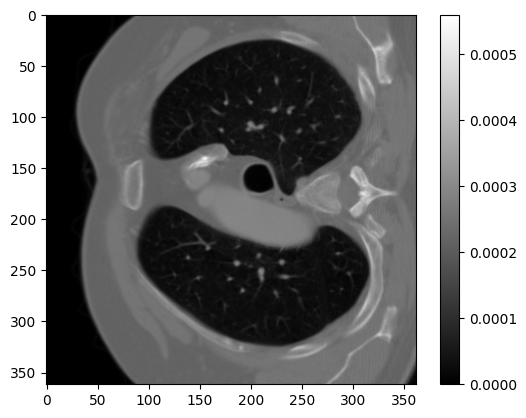

In [ ]:
# read first file of test data
train_path = "gs://final_project_dis/ground_truth_train"
file_path = f"{train_path}/ground_truth_train_000.hdf5"

fs = gcsfs.GCSFileSystem()
with h5py.File(fs.open(file_path, 'rb')) as f:
    ground_truth = f['data'][:]

# Convert to tensor
sample = torch.tensor(ground_truth, dtype=torch.float32)

# Taking the first image to test if the dataset took it correctly
sample_image = sample[1]

#Visualize one image
plt.imshow(sample_image, cmap='gray')
plt.colorbar()
plt.show()